# Project: Loan Repayment Challenge 
#### by Muhammad Danial Bin Zulkifli

In [2]:
import pandas as pd

### Load Dataset

In [3]:
loan = pd.read_csv('./data/loan.csv')
payment = pd.read_csv('./data/payment.csv')
clarity_underwriting_variables = pd.read_csv('./data/clarity_underwriting_variables.csv')

C:\Users\dania\AppData\Local\Temp\ipykernel_17600\3287098233.py:3: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,28,29,31,32,33,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  clarity_underwriting_variables = pd.read_csv('./data/clarity_underwriting_variables.csv')


### Connect Dataset to database for SQL purpose

In [4]:
import sqlite3

# Connect to a database (or create one if it doesn't exist)
conn = sqlite3.connect('example.db')

# Upload the DataFrames to the database
loan.to_sql('loan', conn, if_exists='replace', index=False)
payment.to_sql('payment', conn, if_exists='replace', index=False)
clarity_underwriting_variables.to_sql('clarity', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

## 1. Exploratory Data Analysis

1.1 Loan Dataset

In [5]:
loan.head()

,loanId,anon_ssn,payFrequency,apr,applicationDate,originated,originatedDate,nPaidOff,approved,isFunded,loanStatus,loanAmount,originallyScheduledPaymentAmount,state,leadType,leadCost,fpStatus,clarityFraudId,hasCF
0,LL-I-07399092,beff4989be82aab4a5b47679216942fd,B,360.0,2016-02-23T17:29:01.940000,False,NaN,0.0,False,0,Withdrawn Application,500.0,978.27,IL,bvMandatory,6,NaN,5669ef78e4b0c9d3936440e6,1
1,LL-I-06644937,464f5d9ae4fa09ece4048d949191865c,B,199.0,2016-01-19T22:07:36.778000,True,2016-01-20T15:49:18.846000,0.0,True,1,Paid Off Loan,3000.0,6395.19,CA,prescreen,0,Checked,569eb3a3e4b096699f685d64,1
2,LL-I-10707532,3c174ae9e2505a5f9ddbff9843281845,B,590.0,2016-08-01T13:51:14.709000,False,NaN,0.0,False,0,Withdrawn Application,400.0,1199.45,MO,bvMandatory,3,NaN,579eab11e4b0d0502870ef2f,1
3,LL-I-02272596,9be6f443bb97db7e95fa0c281d34da91,B,360.0,2015-08-06T23:58:08.880000,False,NaN,0.0,False,0,Withdrawn Application,500.0,1074.05,IL,bvMandatory,3,NaN,555b1e95e4b0f6f11b267c18,1
4,LL-I-09542882,63b5494f60b5c19c827c7b068443752c,B,590.0,2016-06-05T22:31:34.304000,False,NaN,0.0,False,0,Rejected,350.0,814.37,NV,bvMandatory,3,NaN,5754a91be4b0c6a2bf424772,1


In [7]:
loan.dtypes

loanId                               object
anon_ssn                             object
payFrequency                         object
apr                                 float64
applicationDate                      object
originated                             bool
originatedDate                       object
nPaidOff                            float64
approved                               bool
isFunded                              int64
loanStatus                           object
loanAmount                          float64
originallyScheduledPaymentAmount    float64
state                                object
leadType                             object
leadCost                              int64
fpStatus                             object
clarityFraudId                       object
hasCF                                 int64
dtype: object

In [8]:
loan.columns[loan.isnull().any()]

Index(['loanId', 'payFrequency', 'apr', 'originatedDate', 'nPaidOff',
       'loanStatus', 'loanAmount', 'state', 'fpStatus', 'clarityFraudId'],
      dtype='object')

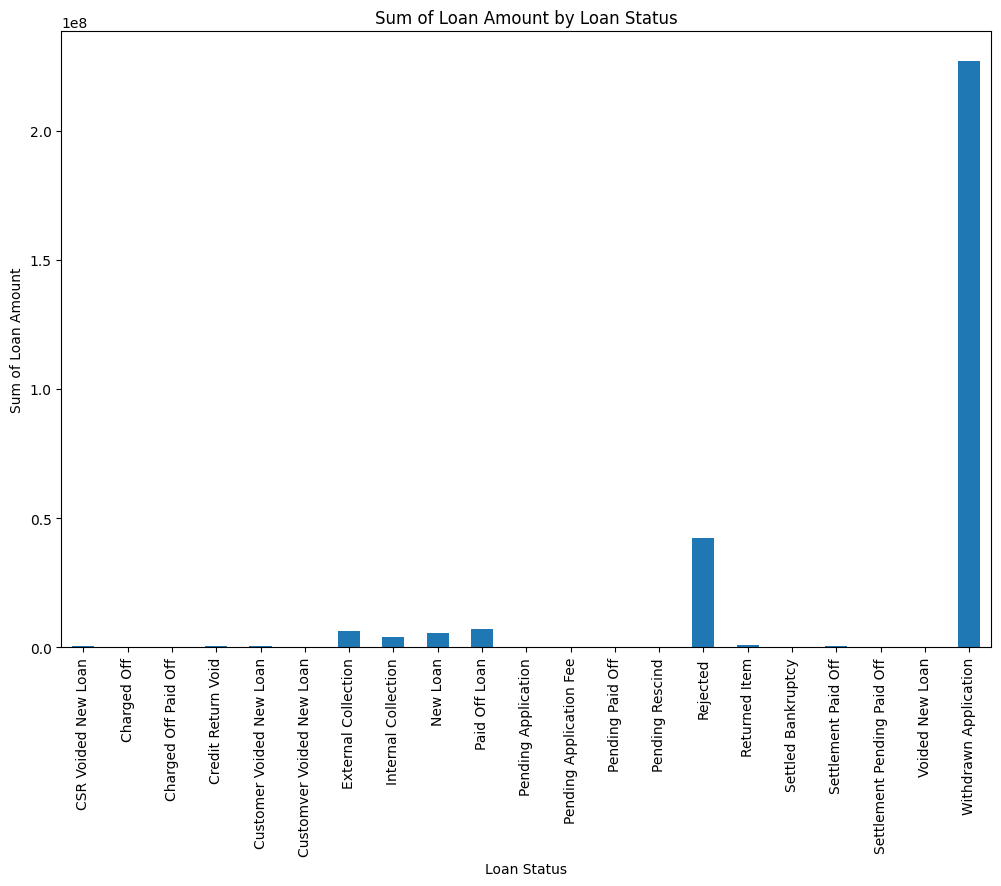

In [9]:
import matplotlib.pyplot as plt

# Group by 'loanStatus' and calculate the sum of 'loanAmount'
grouped = loan.groupby('loanStatus')['loanAmount'].sum()

# Create a bar graph
grouped.plot(kind='bar',figsize=(12, 8))

# Set the title and labels
plt.title('Sum of Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Sum of Loan Amount')

# Show the plot
plt.show()

'Withdrawn Application' status is the highest, it could mean that customers are finding the application process too long or complicated, or they might be finding better options elsewhere. It might be worth investigating why so many applications are being abandoned and whether improvements can be made to the application process to retain these customers.

In [12]:
top_loans = loan.sort_values('loanAmount', ascending=False).head(10)
# Count the number of repeated 'loanId's in the top 10 loans
loanId_counts = top_loans['loanId'].value_counts()

# Print the counts
print(loanId_counts)

loanId
LL-I-01636966    1
LL-I-01642169    1
LL-I-01642252    1
LL-I-01634056    1
LL-I-01634399    1
LL-I-01637282    1
LL-I-11360352    1
LL-I-12080030    1
LL-I-11920977    1
LL-I-10237262    1
Name: count, dtype: int64


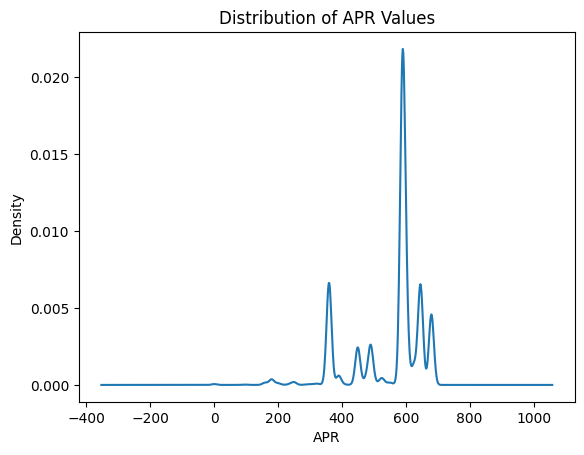

In [13]:
# Plot a kernel density plot of the 'apr' column
loan['apr'].plot(kind='kde')

# Set the title and labels
plt.title('Distribution of APR Values')
plt.xlabel('APR')
plt.ylabel('Density')

# Show the plot
plt.show()

High-Risk Loans: Loans with very high APRs, such as around 600%, are typically considered high-risk loans. Borrowers who opt for loans with such high APRs may be more financially vulnerable or have limited access to traditional credit options.

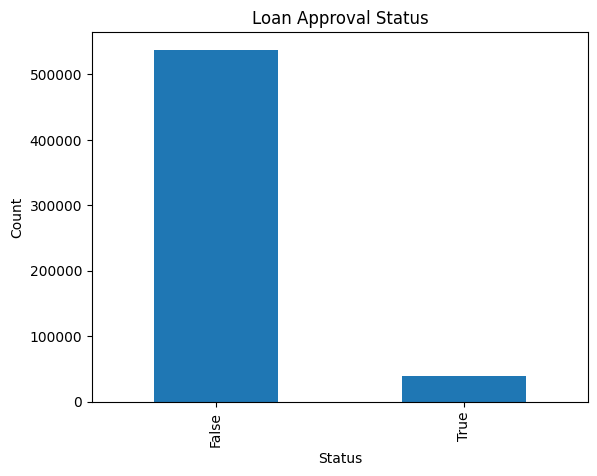

In [200]:
# Python code
import matplotlib.pyplot as plt

loan['approved'].value_counts().plot(kind='bar')
plt.title('Loan Approval Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

- There are big gap different between loan approval status values for False and True, False status has higher count value compared to True
- this column can be used as target for quality (loan repayment)
- Since the column (approved) is meaning that whether or not	a	loan	has	been	approved	(final	step	of	underwriting	before	a	loan	
deposit	is	attempted)

1.2 Payment Dataset

In [30]:
payment

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode
0,LL-I-00000021,1,False,2014-12-19T05:00:00,22.33,147.28,169.61,Checked,NaN
1,LL-I-00000021,2,False,2015-01-02T05:00:00,26.44,143.17,169.61,Checked,NaN
2,LL-I-00000021,3,False,2015-01-16T05:00:00,31.30,138.31,169.61,Checked,NaN
3,LL-I-00000021,4,False,2015-01-30T05:00:00,37.07,132.54,169.61,Checked,NaN
4,LL-I-00000021,5,False,2015-02-13T05:00:00,43.89,125.72,169.61,Checked,NaN
...,...,...,...,...,...,...,...,...,...
689359,LL-I-18629478,8,False,2017-07-14T04:00:00,45.62,17.67,63.29,NaN,NaN
689360,LL-I-18629478,9,False,2017-07-31T04:00:00,45.67,17.62,63.29,NaN,NaN
689361,LL-I-18629478,10,False,2017-08-15T04:00:00,51.12,12.17,63.29,NaN,NaN
689362,LL-I-18629478,11,False,2017-08-31T04:00:00,54.35,8.94,63.29,NaN,NaN


In [33]:
payment['paymentStatus'].value_counts()

paymentStatus
Cancelled                  270334
Checked                    209621
Rejected                    32330
Pending                      9241
Skipped                      3761
Rejected Awaiting Retry        18
Returned                        1
Complete                        1
Name: count, dtype: int64

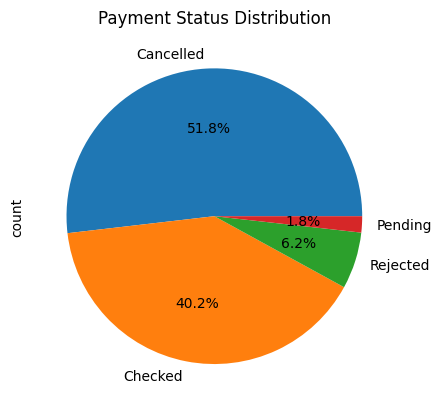

In [38]:
# Count the number of each payment status
payment_status_counts = payment['paymentStatus'].value_counts()
payment_status_percent = 100 * payment_status_counts / payment_status_counts.sum()
mask = payment_status_percent < 1
payment_status_counts = payment_status_counts[~mask]
payment_status_counts['Others'] = payment_status_counts[mask].sum()

def autopct_format(values):
    def my_format(pct):
        return ('%.1f%%' % pct) if pct > 1 else ''
    return my_format

payment_status_counts.plot(kind='pie', autopct=autopct_format(payment_status_counts))

plt.title('Payment Status Distribution')
plt.show()

In [53]:
good_loan = ['Checked','Complete']

In [60]:
import numpy as np

#Classification of the good and bad loans
payment['loan_class'] = np.nan

def loan_condition(status):
    if status in good_loan:
        return 'Good Loan'
    else:
        return 'Potentially Bad Loan'
    
payment['loan_class'] = payment['paymentStatus'].apply(loan_condition)


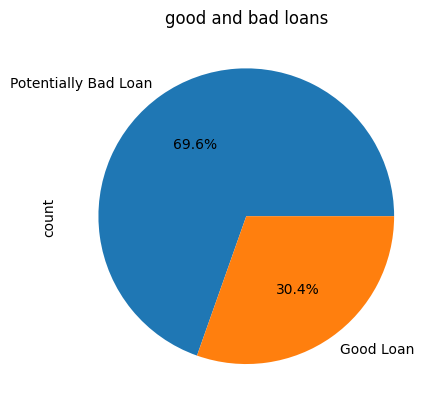

In [62]:
# Pie Chart
loan_class_counts = payment['loan_class'].value_counts()
loan_class_counts.plot(kind='pie', autopct='%1.1f%%')

plt.title('good and bad loans')
plt.show()

- Good loan has been classified as Checked and Complete 
- Bad loan has been classified as Rejected, Pending, Skipped, Rejected Awaiting Retry, Returned, Complete  
- From Pie Chart, it shows that there are more bad loan process compared to good loan process

In [210]:
payment.head(50)
original_payment = loan[loan['loanId'] == 'LL-I-17826953']
selected_payment = payment[payment['loanId'] == 'LL-I-17826953']
selected_payment.head()

,loanId,installmentIndex,isCollection,paymentDate,principal,fees,paymentAmount,paymentStatus,paymentReturnCode,loan_condition,loan_class
648279,LL-I-17826953,1,False,2017-03-10T05:00:00,0.00,56.55,56.55,Pending,NaN,Good Loan,Potentially Bad Loan
648280,LL-I-17826953,2,False,2017-03-17T04:00:00,2.83,49.48,52.31,Pending,NaN,Good Loan,Potentially Bad Loan
648281,LL-I-17826953,3,False,2017-03-24T04:00:00,3.18,49.13,52.31,NaN,NaN,Bad Loan,Potentially Bad Loan
648282,LL-I-17826953,4,False,2017-03-31T04:00:00,3.57,48.74,52.31,NaN,NaN,Bad Loan,Potentially Bad Loan
648283,LL-I-17826953,5,False,2017-04-07T04:00:00,4.02,48.29,52.31,NaN,NaN,Bad Loan,Potentially Bad Loan


In [209]:
print("Payment Amount", selected_payment['paymentAmount'].sum())
print("Scheduled Payment Amount", original_payment['originallyScheduledPaymentAmount'].sum())

Payment Amount 1364.8700000000001
Scheduled Payment Amount 1364.87


- 506.379 value is sum of payment amount of one of the id to check whether it is the value as scheduled payment amount in dataset loan

1.3 Clarity

In [9]:
clarity_underwriting_variables.head()

,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,.underwritingdataclarity.clearfraud.clearfraudinquiry.ninetydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago,.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago,.underwritingdataclarity.clearfraud.clearfraudindicator.inquiryonfilecurrentaddressconflict,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,8.0,2.0,2.0,2.0,8.0,2.0,2.0,5.0,10.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,A8,match,6.0,871.0,54cbffcee4b0ba763e43144d
1,5.0,2.0,2.0,2.0,11.0,2.0,2.0,4.0,21.0,True,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,397.0,54cc0408e4b0418d9a7f78af
2,9.0,4.0,2.0,3.0,10.0,8.0,2.0,9.0,25.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,572.0,54cc0683e4b0418d9a80adb6
3,3.0,2.0,2.0,2.0,9.0,2.0,2.0,2.0,9.0,False,...,(M) Mobile Phone,partial,NaN,NaN,NaN,NaN,match,11.0,838.0,54cc0780e4b0ba763e43b74a
4,5.0,5.0,2.0,2.0,6.0,5.0,2.0,5.0,6.0,False,...,(M) Mobile Phone,match,NaN,NaN,NaN,NaN,match,1.0,768.0,54cc1d67e4b0ba763e445b45


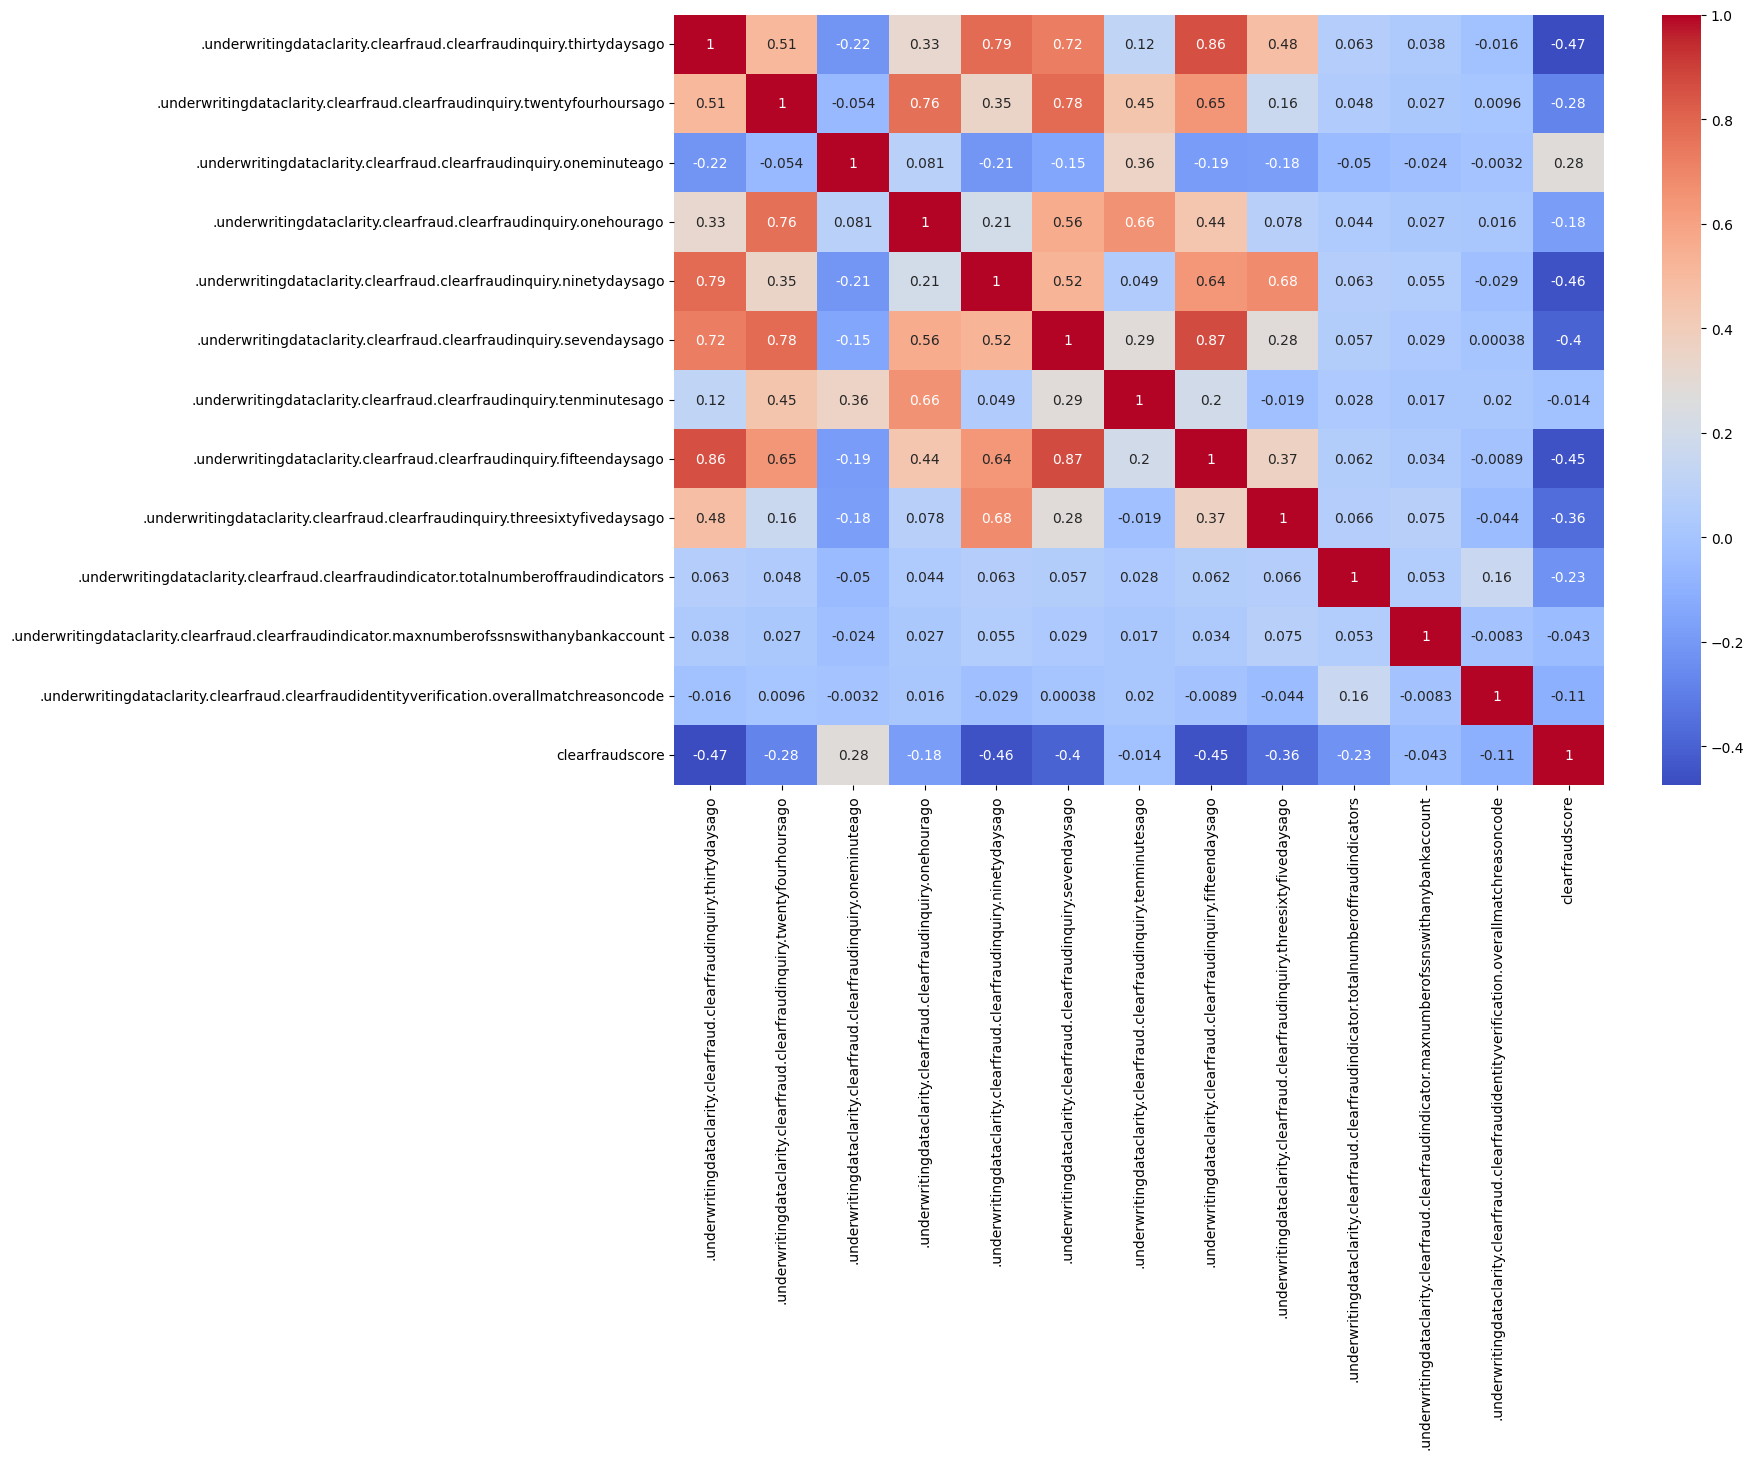

In [10]:
import seaborn as sns
corr_matrix = clarity_underwriting_variables.corr(numeric_only=True)
corr_matrix["clearfraudscore"].sort_values(ascending=False)

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

- The correlation graph is to check correaltion between clear fraud score and other features 
- clear fraud inquiry 30 days ago has highest correlation with clear fraud score

1.4. Combination of Datasets

In [81]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('example.db')

# Execute a SQL query and get the result as a DataFrame
df = pd.read_sql_query("""
                        SELECT 
                            a.loanId, a.apr, a.nPaidOff , a.approved, a.loanStatus, a.loanAmount, a.originallyScheduledPaymentAmount, 
                            b.totalPayment,
                            a.leadType, c.*
                        FROM loan as a
                        LEFT JOIN (
                            SELECT loanId, SUM(paymentAmount) AS totalPayment
                            FROM payment
                            WHERE paymentStatus = 'Checked'
                            GROUP BY loanId
                        ) as b ON a.loanId = b.loanId
                        LEFT JOIN clarity as c ON a.clarityFraudId = c.underwritingid
                        WHERE c.clearfraudscore IS NOT NULL
                       """, conn)

# Close the connection
conn.close()

# Display the DataFrame
df

,loanId,apr,nPaidOff,approved,loanStatus,loanAmount,originallyScheduledPaymentAmount,totalPayment,leadType,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,LL-I-04145682,590.00,1.0,1,Paid Off Loan,600.0,1761.33,897.20,organic,9.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,572.0,54cc0683e4b0418d9a80adb6
1,LL-I-00202645,478.67,0.0,1,Paid Off Loan,600.0,1463.49,731.23,lead,5.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,768.0,54cc1d67e4b0ba763e445b45
2,LL-I-00202774,570.32,0.0,1,External Collection,400.0,1087.90,106.54,lead,11.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,564.0,54cc38e1e4b0ba763e44dad0
3,LL-I-00976973,681.00,0.0,1,External Collection,300.0,1002.86,294.71,organic,6.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,785.0,54cce897e4b0ba763e46c138
4,LL-I-00204105,478.67,0.0,1,Paid Off Loan,800.0,1951.32,1993.07,lead,5.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,691.0,54cd2174e4b0ba763e4b1909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36220,LL-I-18583197,360.00,0.0,1,New Loan,500.0,1139.89,NaN,lead,3.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,771.0,58cc51b6e4b0b0437e1ddc64
36221,LL-I-18583384,360.00,0.0,1,Internal Collection,350.0,738.42,NaN,lead,5.0,...,(M) Mobile Phone,partial,None,None,None,None,match,11.0,585.0,58cc52c7e4b0b0437e1ee2b1
36222,LL-I-18583719,360.00,0.0,1,Returned Item,350.0,792.03,NaN,bvMandatory,11.0,...,(M) Mobile Phone,partial,None,None,None,None,match,11.0,582.0,58cc5577e4b0b0437e23cbcb
36223,LL-I-18583201,681.00,0.0,1,New Loan,300.0,1016.36,NaN,bvMandatory,4.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,576.0,58cc57d4e4b0b0437e278bff


- The SQL query is for Joining dataset of loan, payment and clarity
- Loan is the main dataset since approved is target variable in this case for predicting quality of loan repayment (loan risk)
- Payment dataset is left joined with loan to retrive totalpayment where totalpayment is sum of loan that already been repaid
- Clarity dataset is also left joined with loan to retrieve only row that has underwritingid and clearfraudscore, this clarity dataset is important to know whether loan can approved or not
- Since some underwritingid values are not all available in loan dataset, any NaN values in the column will be dropped

In [215]:
df_evaluation = df

df_evaluation is created to see relationship in data preprocessing later on since data preprocessing steps will be created in pipeline

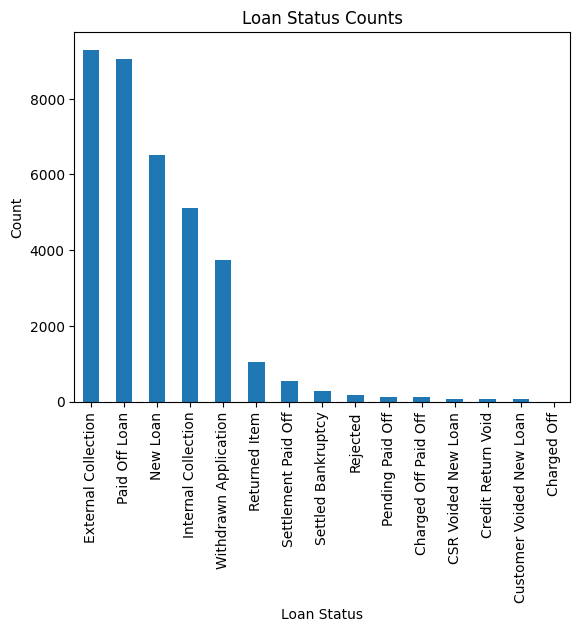

In [216]:
import matplotlib.pyplot as plt

# Count the number of each loan status
loan_status_counts = df_evaluation['loanStatus'].value_counts()

# Create a bar graph
loan_status_counts.plot(kind='bar')

# Set the title and labels
plt.title('Loan Status Counts')
plt.xlabel('Loan Status')
plt.ylabel('Count')

# Show the plot
plt.show()

- Loan Status for External Collection has largest count number followed by paid off loan and new loan
- Before join dataset, withdrawn application has the highest value count and higher gap compared to other status
- This is because not all	rows	in	loan.csv	has	a	corresponding	row	in	clarity_underwriting_variables.csv.	The	
availability	of	the	clarity	variables	depends	on	the	underwriting	flow	for	the	lead
- Now, the joined dataset only has loan id that only has fraud score which important for machine learning training, some 'withdrawn application' loan status from before dont has fraud score since the applicant withdraw before needed to be evaluate

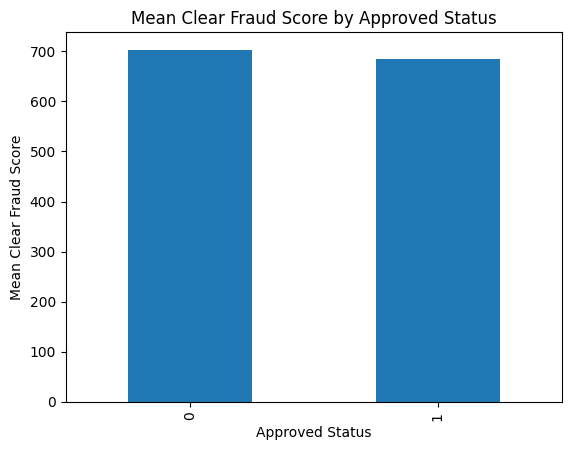

In [217]:
# Group by 'approved' and calculate the mean 'clearfraudscore'
mean_clearfraudscore_by_approved = df_evaluation.groupby('approved')['clearfraudscore'].mean()

# Create a bar graph
mean_clearfraudscore_by_approved.plot(kind='bar')

# Set the title and labels
plt.title('Mean Clear Fraud Score by Approved Status')
plt.xlabel('Approved Status')
plt.ylabel('Mean Clear Fraud Score')

# Show the plot
plt.show()

- Higher Clear Fraud Score meaning higher chance approved status is rejected

In [218]:
# Drop the string columns
df_evaluation = df_evaluation.select_dtypes(exclude=['object'])
df_evaluation.head()

,apr,nPaidOff,approved,loanAmount,originallyScheduledPaymentAmount,totalPayment,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago,.underwritingdataclarity.clearfraud.clearfraudinquiry.oneminuteago,.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago,...,.underwritingdataclarity.clearfraud.clearfraudindicator.maxnumberofssnswithanybankaccount,.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased,.underwritingdataclarity.clearfraud.clearfraudindicator.currentaddressreportedbynewtradeonly,.underwritingdataclarity.clearfraud.clearfraudindicator.creditestablishedbeforeage18,.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate,.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile,.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone,.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore
0,590.00,1.0,1,600.0,1761.33,897.20,9.0,4.0,2.0,3.0,...,2.0,0,0,0,0.0,NaN,1.0,0.0,1.0,572.0
1,478.67,0.0,1,600.0,1463.49,731.23,5.0,5.0,2.0,2.0,...,1.0,0,0,0,0.0,NaN,0.0,0.0,1.0,768.0
2,570.32,0.0,1,400.0,1087.90,106.54,11.0,6.0,6.0,6.0,...,1.0,0,0,0,0.0,NaN,1.0,0.0,1.0,564.0
3,681.00,0.0,1,300.0,1002.86,294.71,6.0,3.0,3.0,3.0,...,2.0,0,0,0,0.0,NaN,1.0,0.0,1.0,785.0
4,478.67,0.0,1,800.0,1951.32,1993.07,5.0,5.0,2.0,3.0,...,1.0,0,1,0,0.0,NaN,0.0,0.0,1.0,691.0


In [219]:
# Get the count of null values for each column
null_counts = df_evaluation.isnull().sum()

# Filter to only columns with null values
null_counts = null_counts[null_counts > 0]

print(null_counts)

apr                                                                                                17
nPaidOff                                                                                            2
loanAmount                                                                                         17
totalPayment                                                                                    10388
.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid               4087
.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate      520
.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile     29151
.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone    19100
.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone    19100
dtype: int64


- These '.underwritingdataclarity...' columns contain a large number of null values, they might not provide enough information for this analysis or model. Sparse data can lead to overfitting in machine learning models. Hence needed to be remove, 
- However for 'totalPayment' it is null since some payment is still in status pending, the totalpayment only sum out paid values only, so it can be set as 0

In [220]:
df_evaluation = df_evaluation.drop(columns=[
    '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseformatinvalid',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.telephonenumberinconsistentwithstate',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.driverlicenseinconsistentwithonfile',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedascellphone',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.workphonepreviouslylistedashomephone'
])

In [221]:
# Replace null values in 'totalPayment' with 0
df_evaluation['totalPayment'] = df_evaluation['totalPayment'].fillna(0)
# Replace null values in 'nPaidOff' with 0
df_evaluation['nPaidOff'] = df_evaluation['nPaidOff'].fillna(0)

# Replace null values in 'loanAmount' and 'apr' with their median values
df_evaluation['loanAmount'] = df_evaluation['loanAmount'].fillna(df_evaluation['loanAmount'].median())
df_evaluation['apr'] = df_evaluation['apr'].fillna(df_evaluation['apr'].median())

Since approved column means that Whether	or	not	a	loan	has	been	approved	(final	step	of	underwriting	before	a	loan	
deposit	is	attempted), it should be the target of this project to predict quality of loan repayment

In [222]:
df_evaluation['.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified'].value_counts()

.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified
0    36225
Name: count, dtype: int64

In [223]:
corr_matrix = df_evaluation.corr(numeric_only=True)
corr_matrix["approved"].sort_values(ascending=False)

approved                                                                                             1.000000
totalPayment                                                                                         0.263717
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     0.041361
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             0.036790
apr                                                                                                  0.034272
.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode            0.031320
.underwritingdataclarity.clearfraud.clearfraudinquiry.sevendaysago                                   0.027899
.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago                                  0.025654
.underwritingdataclarity.clearfraud.clearfraudindicator.inquirycurrentaddressnotonfile               0.024940
.underwrit

- The highest correlation with target is totalPayment columns which is has value of 0.263717
- There is small correlation between target and features which may can be improved by feature engineering to create stronger relationship between features

In [224]:
# Find columns with only one unique value
single_value_columns = df_evaluation.columns[df_evaluation.nunique() == 1]

# Print the single value columns
print(single_value_columns)

Index(['.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified',
       '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased'],
      dtype='object')


- These columns has 1 type of value only which might lead to overfitting or might not improve performance alt all since they dont contribute any usefull information
- Removing constant features can make model training and prediction faster, and reduce the memory usage, because there's less data to process.
- Therefore, it's generally a good idea to remove constant features from dataset before training a machine learning model.

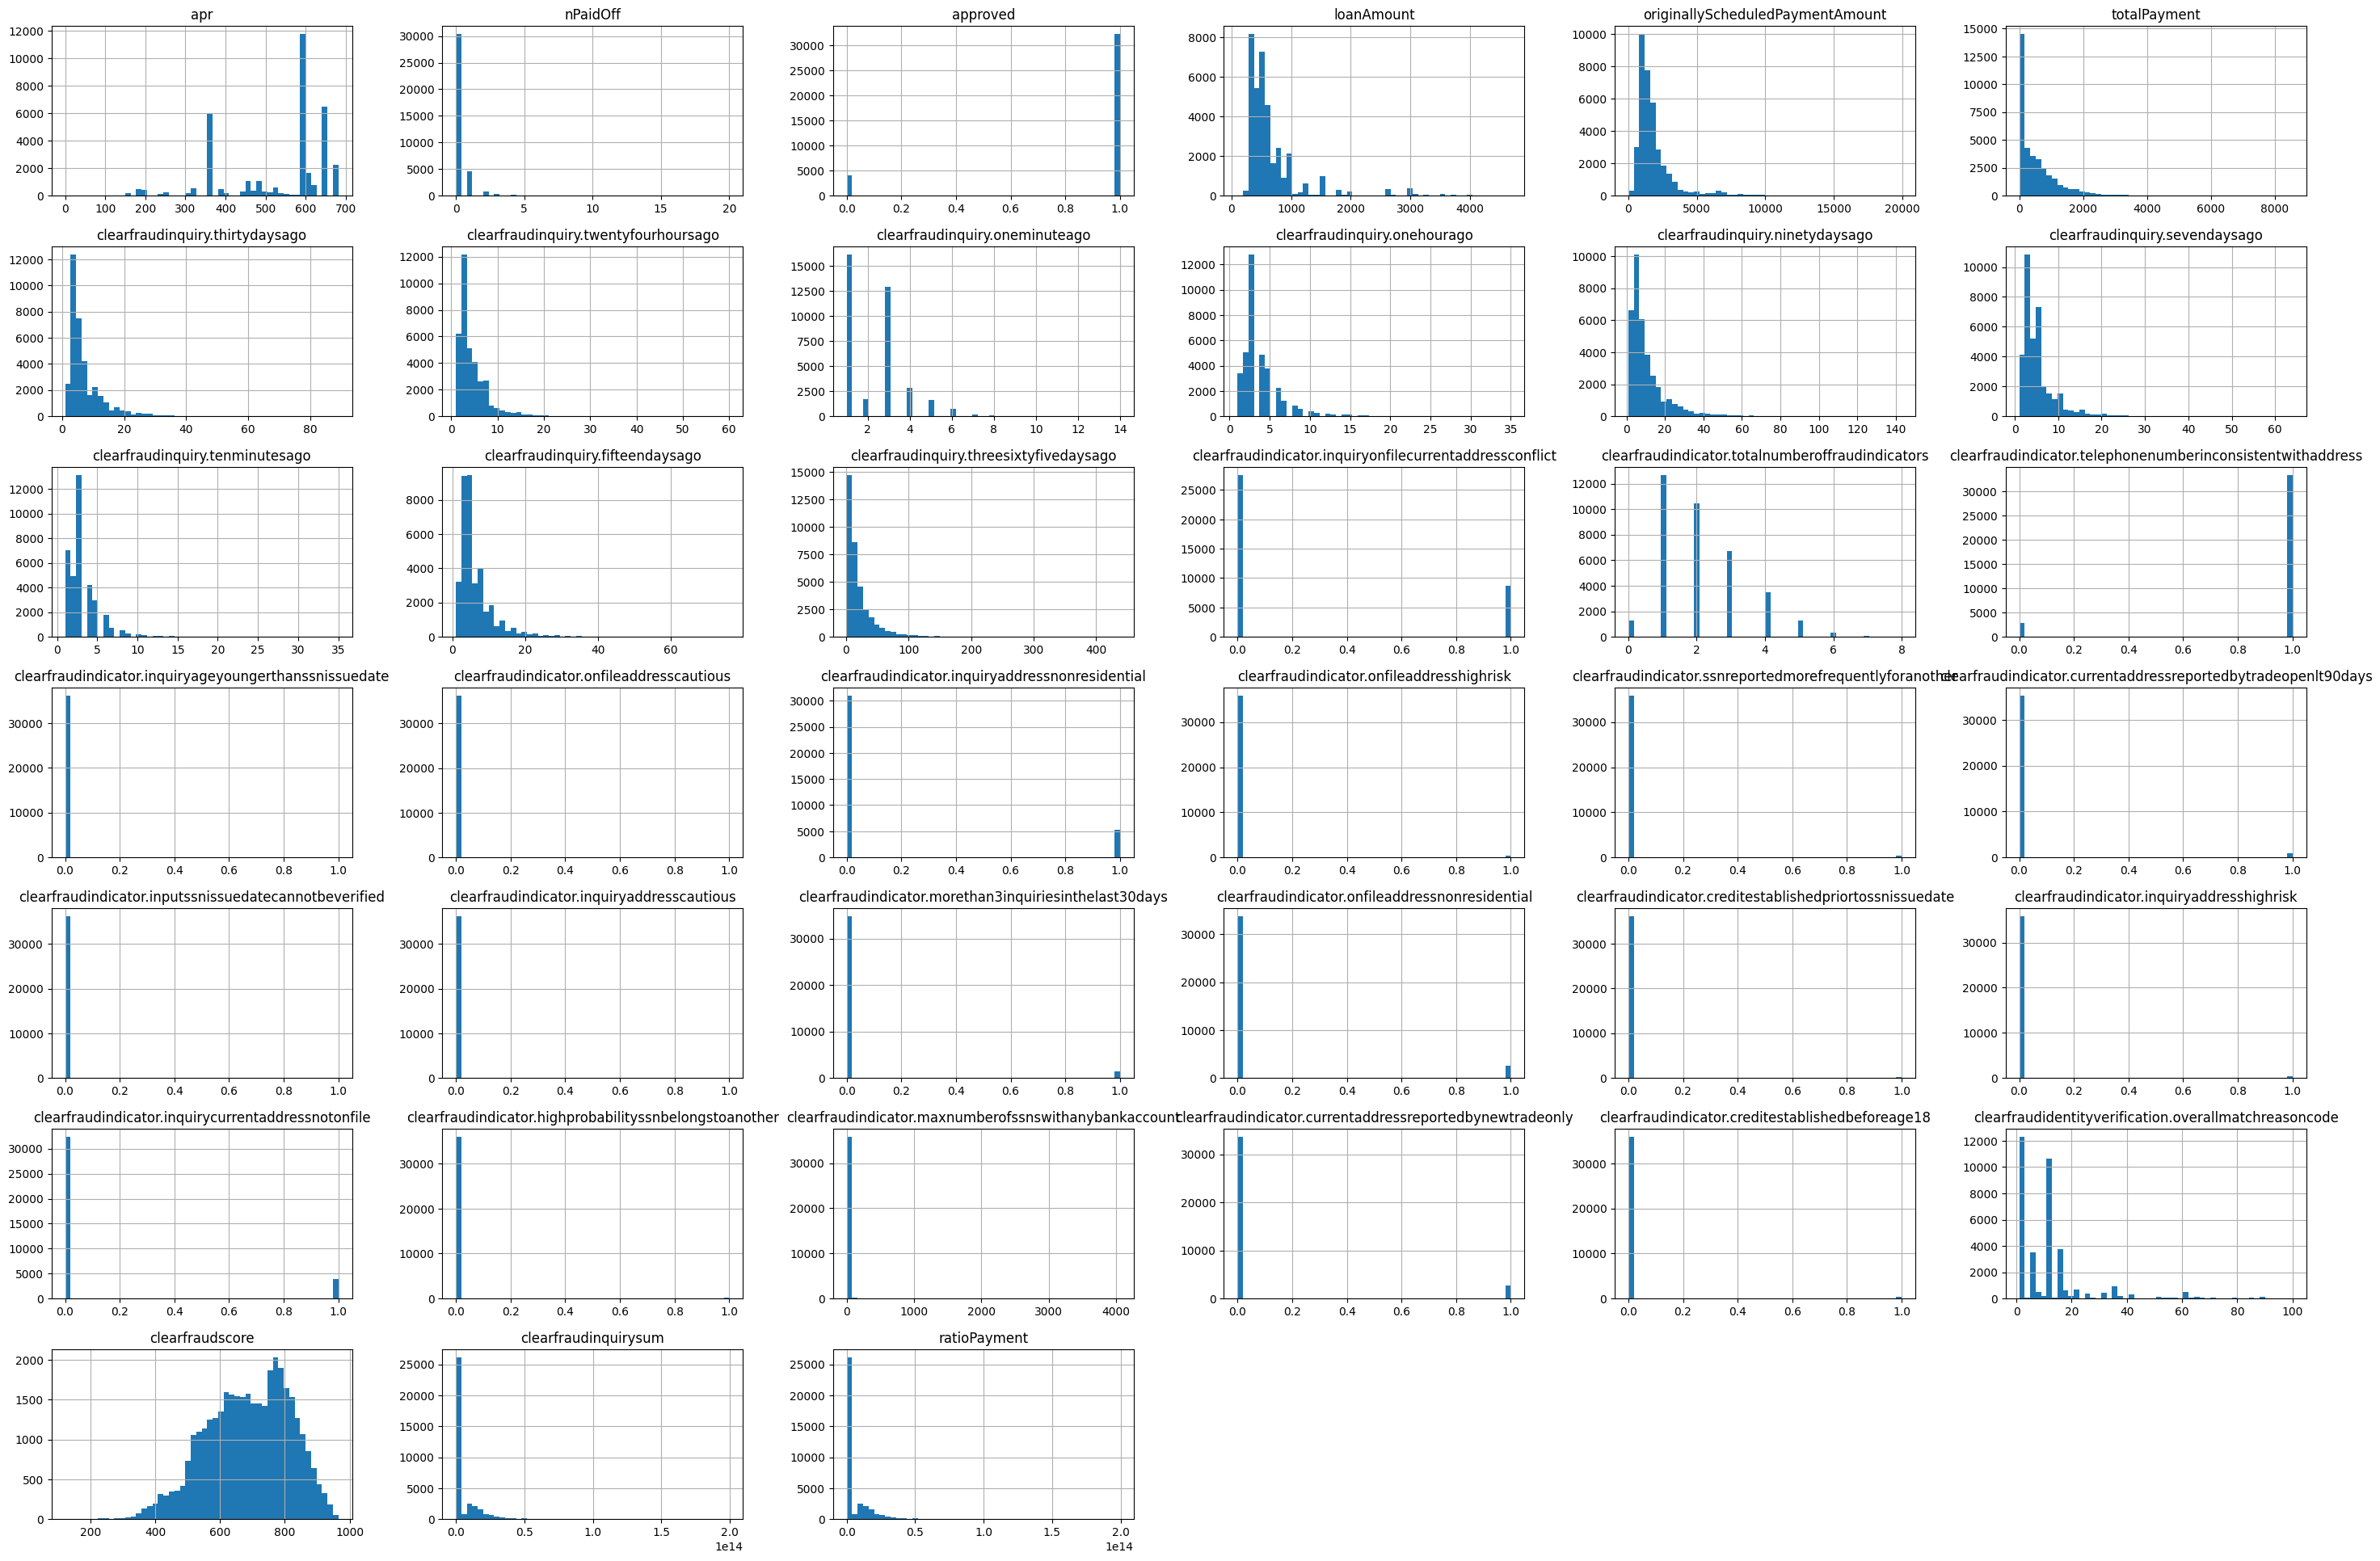

In [212]:
# Rename columns
df_evaluation2 = df_evaluation
df_evaluation2.columns = [col.replace('.underwritingdataclarity.clearfraud.', '') if col.startswith('.underwritingdataclarity.clearfraud.') else col for col in df_evaluation.columns]

# Create histogram
df_evaluation2.hist(bins=50, figsize=(36, 24))
plt.show()

There are many skewed data from the bar plot

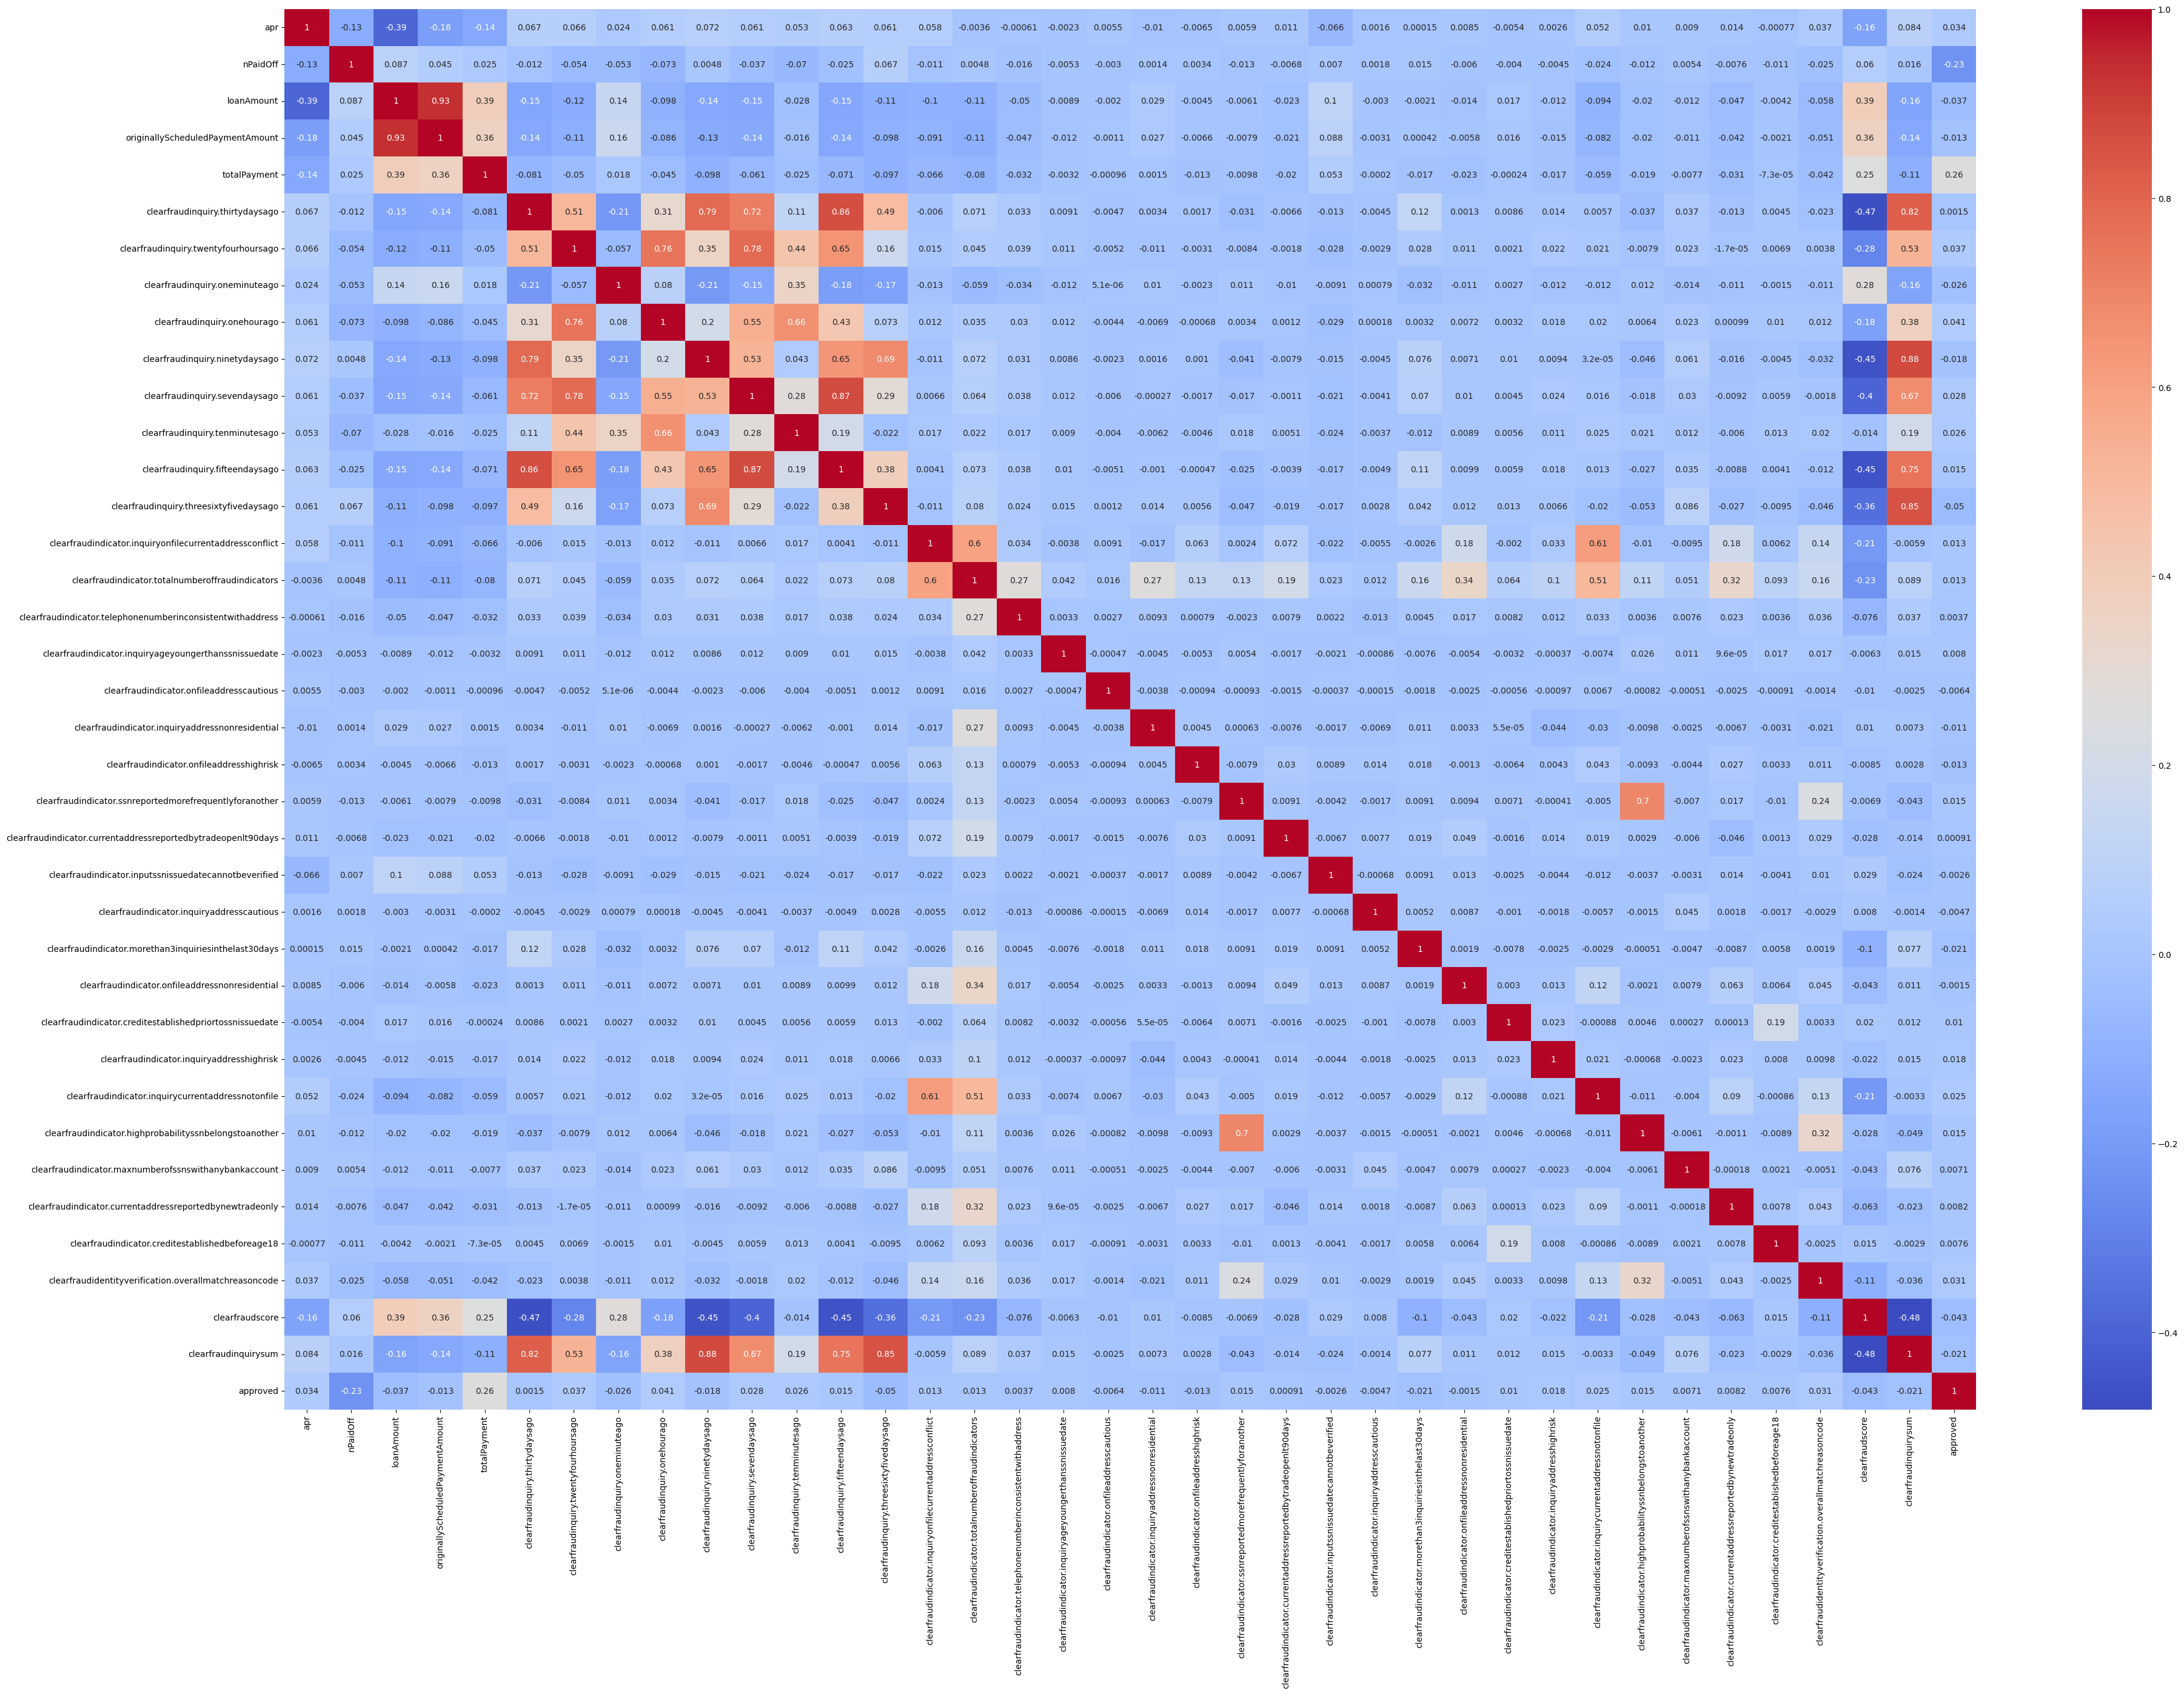

In [120]:
import seaborn as sns

# Move 'approved' column to the end
cols = list(df_evaluation2.columns)
cols.remove('approved')
cols.append('approved')
df_evaluation2 = df_evaluation2[cols]

# Calculate correlation matrix
corr_matrix = df_evaluation2.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(45, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [225]:
df_evaluation = df_evaluation.drop(columns=[
    '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified',
    '.underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased'
])



In [226]:
df_evaluation["ratioPayment"] = (
    df_evaluation["originallyScheduledPaymentAmount"] /
    (df_evaluation["totalPayment"] + 1e-10)
)
corr_matrix = df_evaluation.corr(numeric_only=True)
corr_matrix["approved"].abs().sort_values(ascending=False)

approved                                                                                             1.000000
ratioPayment                                                                                         0.380068
totalPayment                                                                                         0.263717
nPaidOff                                                                                             0.232524
.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago                          0.049759
clearfraudscore                                                                                      0.043113
.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago                                     0.041361
loanAmount                                                                                           0.037486
.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago                             0.036790
apr       

- From combination of feature which is ratio between originallyScheduledPayment and totalPayment shows better correlation with the target 'approved'
- This is because originallyScheduledPayment is related to totalPayment 
- totalPayment is total loan that already been paid by customer while originallyScheduledPayment is the amount we should receive if customer pays off all his scheduled payments

### 2. Split Train Test Data

In [123]:
df.head()

,loanId,apr,nPaidOff,approved,loanStatus,loanAmount,originallyScheduledPaymentAmount,totalPayment,leadType,.underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago,...,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonematchtypedescription,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchresult,.underwritingdataclarity.clearfraud.clearfraudidentityverification.phonetype,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssnnamereasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.nameaddressreasoncode,.underwritingdataclarity.clearfraud.clearfraudidentityverification.ssndobmatch,.underwritingdataclarity.clearfraud.clearfraudidentityverification.overallmatchreasoncode,clearfraudscore,underwritingid
0,LL-I-04145682,590.00,1.0,1,Paid Off Loan,600.0,1761.33,897.20,organic,9.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,572.0,54cc0683e4b0418d9a80adb6
1,LL-I-00202645,478.67,0.0,1,Paid Off Loan,600.0,1463.49,731.23,lead,5.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,768.0,54cc1d67e4b0ba763e445b45
2,LL-I-00202774,570.32,0.0,1,External Collection,400.0,1087.90,106.54,lead,11.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,564.0,54cc38e1e4b0ba763e44dad0
3,LL-I-00976973,681.00,0.0,1,External Collection,300.0,1002.86,294.71,organic,6.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,785.0,54cce897e4b0ba763e46c138
4,LL-I-00204105,478.67,0.0,1,Paid Off Loan,800.0,1951.32,1993.07,lead,5.0,...,(M) Mobile Phone,match,None,None,None,None,match,1.0,691.0,54cd2174e4b0ba763e4b1909


In [133]:
from sklearn.model_selection import train_test_split

X = df.drop('approved', axis=1)  # independent columns
y = df['approved']    # target column
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3. Data Preprocessing

Build Pipeline

In [134]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

def column_ratio(X):
    return X[:, [0]] / (X[:, [1]]+ 1e-10)

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"] # feature names out

def log_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(np.log1p, feature_names_out="one-to-one"),
        StandardScaler())
def default_num_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        StandardScaler())

def zero_fill_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="constant", fill_value=0),
        StandardScaler())
    
def drop_column(X):
    df = pd.DataFrame(X)
    df.drop(df.columns[0], axis=1, inplace=True)
    return df

def drop_column_pipeline():
    return make_pipeline(
        FunctionTransformer(drop_column, validate=False)
    )

def drop_object_columns(X):
    df = pd.DataFrame(X)
    object_cols = df.select_dtypes(include=['object']).columns
    df.drop(object_cols, axis=1, inplace=True)
    return df

def drop_object_columns_pipeline():
    return make_pipeline(
        FunctionTransformer(drop_object_columns, validate=False)
    )

# Use the new pipeline in the ColumnTransformer
preprocessing = ColumnTransformer([
    ("drop_object_columns", drop_object_columns_pipeline(), make_column_selector(dtype_include=object)),
    ("drop_column", drop_column_pipeline(),[".underwritingdataclarity.clearfraud.clearfraudindicator.inputssninvalid",
                                            ".underwritingdataclarity.clearfraud.clearfraudindicator.inputssnrecordedasdeceased",
                                            ".underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnissuedatecannotbeverified",
                                            ".underwritingdataclarity.clearfraud.clearfraudindicator.bestonfilessnrecordedasdeceased"]),
    ("zero_fill", zero_fill_pipeline(), ["nPaidOff", "totalPayment"]),
    ("paymentratio", ratio_pipeline(), ["originallyScheduledPaymentAmount", "totalPayment"]),
    ("log", log_pipeline(), ["loanAmount", "originallyScheduledPaymentAmount", "totalPayment", ".underwritingdataclarity.clearfraud.clearfraudinquiry.thirtydaysago", 
                             ".underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago", ".underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago",
                             ".underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago", ".underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago", 
                             ".underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago"]),
],remainder=default_num_pipeline())

data_prepared = preprocessing.fit_transform(X_train)
data_prepared.shape

(28980, 46)

All data preprocessing part is put into 1 pipeline
From the pipeline:
- Object columns are dropped for model compatibility purpose (Many machine learning algorithms (like linear regression, logistic regression, SVM, etc.) can only handle numerical input) and some dont give any meaning for features training
- Log_pipeline is for handling skewed data as seen in the bar graph before
- drop_column_pipeline is for dropping unimportant columns
- zero_fill_pipeline is to set NaN rows in some columns as zero
- ratio_pipeline is for feature combination purpose which ratio between columns to get better correlation of features and target which is totalPayment and originallySchedulePaymentAmount
- default_num_pipeline is to set Nan rows in columns as median value

### 4. Training Model

In [135]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [136]:
# SGDClassifier
sgd_clf = make_pipeline(preprocessing,SGDClassifier(random_state=42))
sgd_clf.fit(X_train, y_train)

# Decision Tree
tree_clf = make_pipeline(preprocessing,tree.DecisionTreeClassifier())
tree_clf.fit(X_train, y_train)

# Random Forest
forest_clf = make_pipeline(preprocessing,RandomForestClassifier(n_estimators=100, random_state=42))
forest_clf.fit(X_train, y_train)

# logistic regression
log_clf = make_pipeline(preprocessing, LogisticRegression(max_iter=5000))
log_clf.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                              SimpleImputer(strategy='median')),
                                                             ('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('drop_object_columns',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function drop_object_columns at 0x000001824CCC0F40>))]),
                                                  <sklearn.compose._column_...
                                                   '.underwritingdataclarity.clearfraud.clearfraudinquiry.twentyfourhoursago',
                                                   '.underwritingdataclarity.clearfraud.clearfraudinquiry.onehourago',
                                                   '.underwritingdataclarity.clearfraud.clearfraudinquiry.tenminutesago',
                                                   '.underwritingdataclarity.clearfraud.clearfraudinquiry.fifteendaysago',
                                                   '.underwritingdataclarity.clearfraud.clearfraudinquiry.threesixtyfivedaysago'])])),
                ('linearregression', LinearRegression())])

- SGD Classifier, Decision Tree Classifier, Random Forest Classifier and Logistic Regression are used for the model trainig since they are one of the most suitable model for training binary classification

### 5. Evaluation

In [140]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict

def evaluate_model(model, model_name, X, y, cv=3):
    score = cross_val_score(model, X, y, cv=cv, scoring="accuracy").mean()
    y_pred = cross_val_predict(model, X, y, cv=cv)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    return [score, precision, recall, f1]

model_comp = {}

model_comp['SGD'] = evaluate_model(sgd_clf, 'SGD', X_train, y_train)
model_comp['decision tree'] = evaluate_model(tree_clf, 'decision tree', X_train, y_train)
model_comp['random forest'] = evaluate_model(forest_clf, 'random forest', X_train, y_train)
model_comp['logistic regression'] = evaluate_model(log_clf, 'logistic regression', X_train, y_train)

df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['CV Accuracy','Precision','Recall','F1_score']
df1.style.background_gradient(cmap='Greens')

,CV Accuracy,Precision,Recall,F1_score
SGD,0.925500,0.938426,0.980559,0.959030
decision tree,0.908247,0.952914,0.944742,0.948810
random forest,0.936232,0.952143,0.977416,0.964614
logistic regression,0.924500,0.934836,0.983663,0.958628


In [227]:
model_comp = {}

model_comp['SGD'] = evaluate_model(sgd_clf, 'SGD', X_test, y_test)
model_comp['decision tree'] = evaluate_model(tree_clf, 'decision tree', X_test, y_test)
model_comp['random forest'] = evaluate_model(forest_clf, 'random forest', X_test, y_test)
model_comp['logistic regression'] = evaluate_model(log_clf, 'logistic regression', X_test, y_test)

df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['CV Accuracy','Precision','Recall','F1_score']
df1.style.background_gradient(cmap='Greens')

,CV Accuracy,Precision,Recall,F1_score
SGD,0.924500,0.939403,0.978089,0.958356
decision tree,0.903796,0.949500,0.943745,0.946614
random forest,0.937198,0.949084,0.981974,0.965249
logistic regression,0.926294,0.937955,0.981974,0.959459


Random Forest has the highest cross validation accuracy for both test and training set compared to other models

In [146]:
y_test_pred_sgd = cross_val_predict(sgd_clf, X_test, y_test, cv=3)
y_test_pred_tree = cross_val_predict(tree_clf, X_test, y_test, cv=3)
y_test_pred_forest = cross_val_predict(forest_clf, X_test, y_test, cv=3)
y_test_pred_log = cross_val_predict(log_clf, X_test, y_test, cv=3)

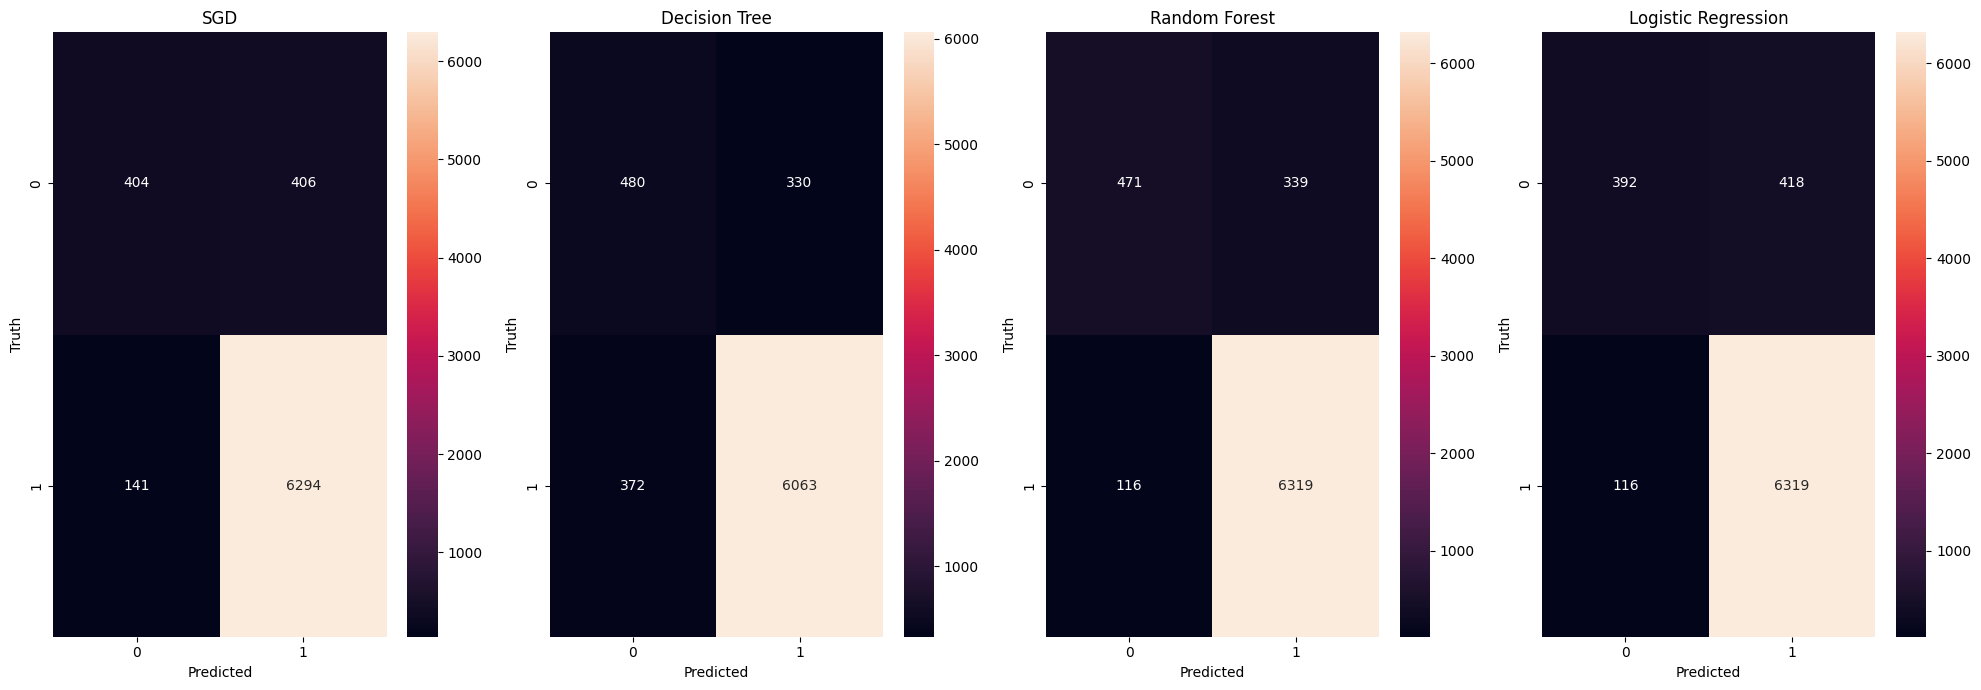

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm_sgd = confusion_matrix(y_test, y_test_pred_sgd)
cm_tree = confusion_matrix(y_test, y_test_pred_tree)
cm_forest = confusion_matrix(y_test, y_test_pred_forest)
cm_log = confusion_matrix(y_test, y_test_pred_log)

plt.figure(figsize=(20,7))

# SGD
plt.subplot(1, 4, 1)  # 1 row, 3 columns, plot number 1
sns.heatmap(cm_sgd, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('SGD')

# Decision Tree
plt.subplot(1, 4, 2)  # 1 row, 3 columns, plot number 2
sns.heatmap(cm_tree, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Decision Tree')

# Random Forest
plt.subplot(1, 4, 3)  # 1 row, 3 columns, plot number 3
sns.heatmap(cm_forest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest')


# Random Forest
plt.subplot(1, 4, 4)  # 1 row, 3 columns, plot number 3
sns.heatmap(cm_log, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Logistic Regression')

plt.tight_layout()  # adjust spacing between plots to minimize the overlaps
plt.show()

- The confusion matrix shows random forest and logistic regression is better for for differentiation of FN and TP value 
- Decision tree shows better differentiation of TN and FP values
- However, random forest has better overall accuracy compared to other mother

In [162]:

from sklearn.metrics import classification_report
y_test_pred_forest = cross_val_predict(forest_clf, X_test, y_test, cv=3)
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

           0       0.80      0.58      0.67       810
           1       0.95      0.98      0.97      6435

    accuracy                           0.94      7245
   macro avg       0.88      0.78      0.82      7245
weighted avg       0.93      0.94      0.93      7245



- From the confusion matrix, TP value is near to FP  value means that the number of times your model correctly predicted the positive class (TP) is close to the number of times it incorrectly predicted the positive class (FP) since there is less data of not approved loan compared to approved loan
- Classification report also shows recall score is lower for not approved loan (0.58) compared to approved (0.98)
- The recall can be improved by adjusting classfication threshold
- However, the precision for both approved and not approved are higher

### 6. Hyperparameter Tuning

- Since Random Forest has highest cv accuracy, hence will be used as final model for hyperparameter tuning

In [159]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestClassifier(random_state=42)),
])

# Define the parameter grid for Random Forest
param_grid_rf = {
    'random_forest__max_features': [2,4,6,8,10,12,14,16] # Number of trees in the forest
}

# Perform Grid Search CV
grid_search_rf = GridSearchCV(full_pipeline, param_grid_rf, cv=3, scoring='neg_root_mean_squared_error')

grid_search_rf.fit(X_train, y_train)
final_model_rf = grid_search_rf.best_estimator_

# Get CV results
cv_res_rf = pd.DataFrame(grid_search_rf.cv_results_)
cv_res_rf.sort_values(by="mean_test_score", ascending=False, inplace=True)

# Get best hyperparameters
best_hyperparameters_grid_rf = grid_search_rf.best_params_
best_n_estimators = best_hyperparameters_grid_rf['random_forest__max_features']


In [161]:
best_n_estimators

6

In [160]:

from sklearn.metrics import classification_report
y_test_pred_forest = cross_val_predict(final_model_rf, X_test, y_test, cv=3)
print(classification_report(y_test, y_test_pred_forest))

              precision    recall  f1-score   support

           0       0.80      0.58      0.67       810
           1       0.95      0.98      0.97      6435

    accuracy                           0.94      7245
   macro avg       0.88      0.78      0.82      7245
weighted avg       0.93      0.94      0.93      7245



- The accuracy after and before hyperparemeter tuning is the same might be because The default parameters were already optimal

### 7. Interpretation and Analysis

7.1 Precision and Recall Trade off method

In [176]:
y_scores = forest_clf.predict_proba(X_test)[:, 1]  # get probabilities for the positive class
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [177]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

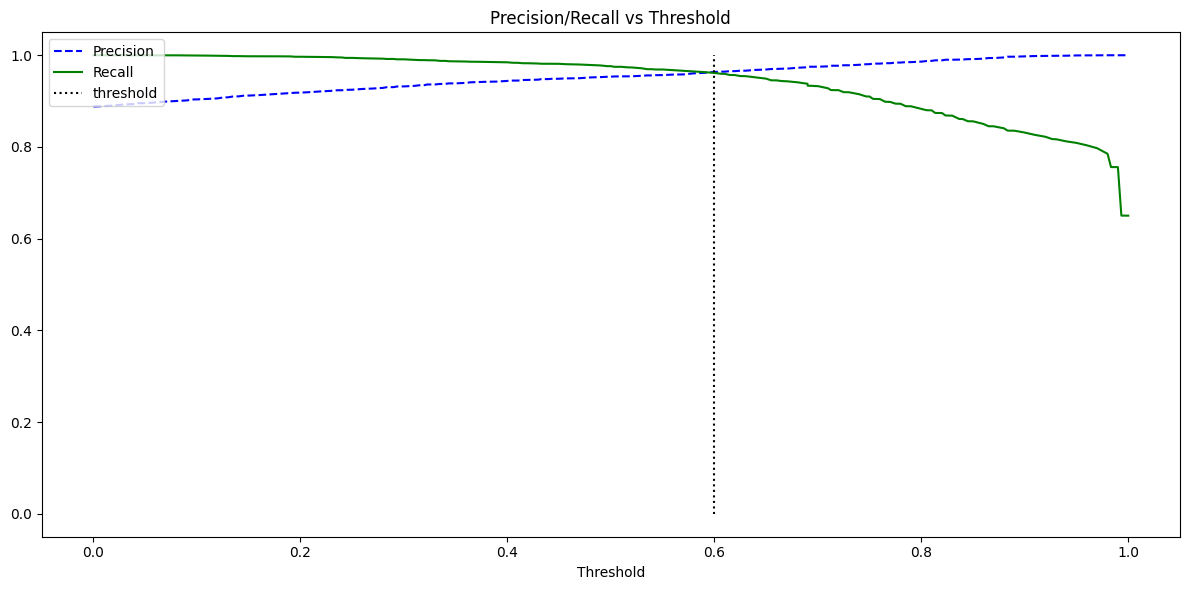

In [180]:
# Plot Precision-Recall curve
threshold = 0.6
plt.figure(figsize=(12, 6))

plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

plt.xlabel('Threshold')
plt.legend(loc="upper left")
plt.title('Precision/Recall vs Threshold')

plt.tight_layout()
plt.show()

In [187]:
idx_for_precision = (precision >= 0.897).argmax()
threshold_for_precision = thresholds[idx_for_precision]
threshold_for_precision

0.06

In [188]:
y_test_pred_tradeoff= (y_scores >= threshold_for_precision)
precision_score(y_test, y_test_pred_tradeoff)

0.8970998326826548

In [189]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_scores)

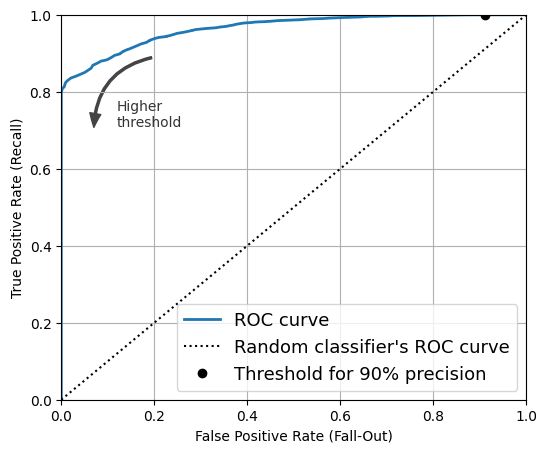

In [192]:
from matplotlib import patches
idx_for_threshold= (thresholds <= threshold_for_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold], fpr[idx_for_threshold]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.gca().add_patch(patches.FancyArrowPatch(
    (0.20, 0.89), (0.07, 0.70),
    connectionstyle="arc3,rad=.4",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))
plt.text(0.12, 0.71, "Higher\nthreshold", color="#333333")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
#save_fig("roc_curve_plot")

plt.show()


In [194]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_scores)

0.964949494949495

Before Trade Off
              precision    recall  f1-score   support

           0       0.76      0.62      0.68       810
           1       0.95      0.97      0.96      6435

    accuracy                           0.94      7245
   macro avg       0.86      0.80      0.82      7245
weighted avg       0.93      0.94      0.93      7245

After Trade Off
              precision    recall  f1-score   support

           0       0.99      0.09      0.16       810
           1       0.90      1.00      0.95      6435

    accuracy                           0.90      7245
   macro avg       0.94      0.54      0.55      7245
weighted avg       0.91      0.90      0.86      7245



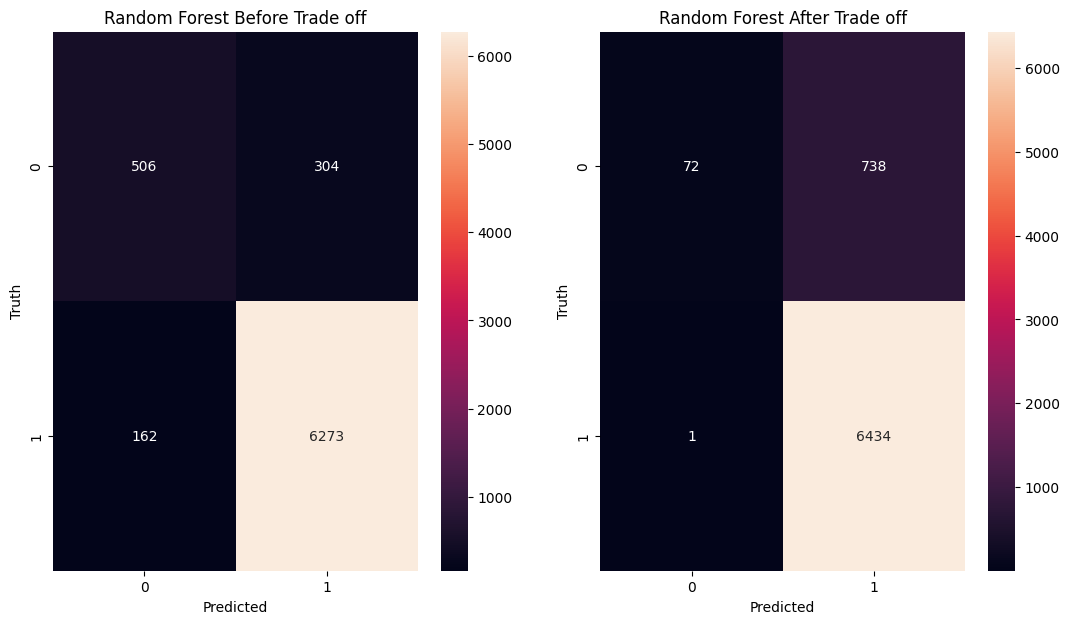

In [199]:
y_pred = (y_scores >= threshold_for_precision).astype(int)
y_test_pred_forest = forest_clf.predict(X_test)


# Comparison of confusion matrix after and before trade off
cm_forest_tradeoff = confusion_matrix(y_test, y_pred)
cm_forest = confusion_matrix(y_test, y_test_pred_forest)

plt.figure(figsize=(20,7))
plt.subplot(1, 3, 1)  # 1 row, 3 columns, plot number 1
sns.heatmap(cm_forest, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest Before Trade off')


plt.subplot(1, 3, 2)  # 1 row, 3 columns, plot number 1
sns.heatmap(cm_forest_tradeoff, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Random Forest After Trade off')


print("Before Trade Off")
print(classification_report(y_test, y_test_pred_forest))

print("After Trade Off")
print(classification_report(y_test, y_pred))


- Recall Improvement: By adjusting the threshold to 0.6, the model is better able to correctly identify instances where a loan is not approved as in confusion matrix. This means that the model is less likely to falsely predict that a loan will be approved when it actually won't be.

- Accuracy Trade-off: However, this improvement in recall comes at the cost of overall accuracy. The model's total accuracy (the proportion of all predictions that are correct) has decreased to 90%. This suggests that while the model has gotten better at identifying true negatives (loans that won't be approved), it may have gotten a little bit worse at identifying true positives (loans that will be approved) or it may be predicting more false positives (predicting a loan will be approved when it won't be).

In conclusion, the decision to adjust the threshold and accept this trade-off depends on the specific requirements of your project. If it's more important to correctly identify all loans that won't be approved (even if it means incorrectly classifying some loans that will be), then this trade-off might be acceptable. However, if overall accuracy is more important, then we might need to explore other ways which is to increased 'not approved loan' data that has clarityFraudId data

### 8. Conclusion

- Random Forest Classifier can be used for detecting quality of loan repayment whether it is approved or not since it has higher model accuracy compared to other models
- However, there is low recall value for 'false' approved since the dataset has not enough data for 'false' approved with clarity fraud score
- This can be improved by using precision recall trade off for improving the recall score while sacrificing a bit of accuracy from 94% to 90%
- But, the accuracy is high enough for a good prediction of loan quality
- This can conclude that the project succesfully predict loan quality